##neural network

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

import tensorflow as tf
%matplotlib inline

2024-06-15 07:06:03.499428: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 07:06:03.501918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 07:06:03.554914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 07:06:03.556059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 07:06:04.456159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# inpDir = os.path.join('..','..','input')
# outDir = 
# subDir = 

CMAP = plt.cm.brg
plt.set_cmap(CMAP);
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

plt.style.use('bmh')

EPOCHS = 500 #number of epochs
BATCH_SIZE = 32
ALPHA = 0.001 #learning rate
NUM_SAMPLES = 1280 #How many samples we want to genertae
NOISE = 0.2 #Noise to be introduced in the data
TEST_SIZE = 0.2

<Figure size 640x480 with 0 Axes>

In [3]:
#function to plot history
def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2,figsize = (15,6))
    
    props = dict(boxstyle='round', facecolor='cyan', alpha =0.4, edgecolor = 'b')
    
    ax = axes[0]
    
    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], ax =ax, colormap=CMAP)
    
    lossmin = hist_df[hist_df.columns[0]].min()
    
    testmin = hist_df[hist_df.columns[2]].min()
    
    fmtStr = "Min {}: \n Traiining : {:7.4f}\n Testing  :  {:7.4f}"
    
    txtstr = fmtStr.format(hist_df.columns[0], lossmin, testmin) #text to plot
    
    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize= 14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel("Epochs")
    
    ax.set_ylabel(hist_df.columns[0].capitalize())
    ax = axes[1]
    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax=ax, colormap=CMAP)
    
    #little beautification
    accmin = hist_df[hist_df.columns[1]].max()    
    
    testmin = hist_df[hist_df.columns[3]].max()
    
    fmtStr = "Max {}: \n Training : {:7.4f}\n Testing  : {:7.4f}"
    txtstr = fmtStr.format(hist_df.columns[1], accmin, testmin) #text to plot
    
    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize= 14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel("Epochs")
    
    ax.set_ylabel(hist_df.columns[1].capitalize())
    
    plt.tight_layout()

Generate Datasets

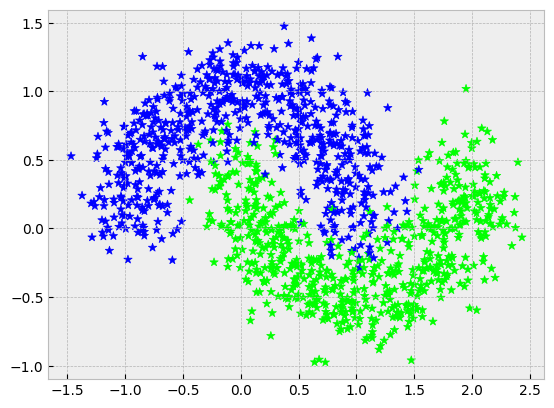

In [4]:
X, y = datasets.make_moons(n_samples=NUM_SAMPLES,shuffle=True, noise=NOISE,random_state=RANDOM_STATE)

#Lets Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, marker='*', cmap=CMAP);

DAY 9 Continue

In [24]:
def fn_plot_decision_boundary(model, X, y):
    
    #Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    #grid size for mesh grid
    h = 0.01
    
    #Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    #Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z =Z.argmax(axis = 1) #take max arguments
    
    #Make its shape same as that of xx
    Z = Z.reshape(xx.shape)
    
    #Now we have Z value corresponding to each of  the combination of xx and yy 
    #Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=CMAP, alpha = 0.6)
    
    #plot the points as well
    plt.scatter(X[:,0], X[:, 1], c=y, cmap=CMAP, edgecolors='black')

In [6]:
#Split the data in training and test sets to measure performance of the moodel.
X_train, X_test , y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1024, 2) (1024,) (256, 2) (256,)


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

##Prepare Model

Build 'tf.keras.Sequential'model by taking  'tf.keras.layers.Dence'

In [8]:
tf.keras.layers.Dense?

Init signature: tf.keras.layers.Dense(*args, **kwargs)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_size, d0, d1)`, then we create
a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2
of the `input`, on every sub-tensor of shape `(1, 1, d1)` (there are
`batch_size * d0` such sub-tensors).  The output in this case will have
shape `

In [9]:
model =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh'), 
    tf.keras.layers.Dense(2)]) #Two outputs for two classes
#model.output_shape

2024-06-15 07:06:06.250331: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
X_train[:1].shape

(1, 2)

In [11]:
predictions = model(X_train[:1])
predictions.numpy()

array([[ 0.33853328, -1.1457182 ]], dtype=float32)

In [12]:
tf.nn.softmax(predictions).numpy().sum()

1.0

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 4)                    12        
                                                                 
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
import sys
sys.float_info.max, sys.float_info.min

(1.7976931348623157e+308, 2.2250738585072014e-308)

In [15]:
#np.exp(710)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)

In [17]:
y_train[:1]

array([0])

In [18]:
loss_fn(y_train[:1], predictions).numpy()

0.20430475

In [19]:
model.compile?


Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      `y_t

## Compile the model:
- Loss function
- Optimizer
- list metrics to another

## Fit the model
- Training Features
- Training Target
- validation(test)
- batch_size
- epochs


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
                loss=loss_fn,
                metrics=['accuracy'])
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose='auto',
    validation_data=[X_test, y_test])

Epoch 1/500
32/32 [==============================] - 1s 9ms/step - loss: 0.5005 - accuracy: 0.7031 - val_loss: 0.4478 - val_accuracy: 0.7656
Epoch 2/500
32/32 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.7412 - val_loss: 0.4115 - val_accuracy: 0.8125
Epoch 3/500
32/32 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.7832 - val_loss: 0.3840 - val_accuracy: 0.8203
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8057 - val_loss: 0.3619 - val_accuracy: 0.8398
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.8154 - val_loss: 0.3446 - val_accuracy: 0.8633
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8271 - val_loss: 0.3301 - val_accuracy: 0.8711
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.8379 - val_loss: 0.3189 - val_accuracy: 0.8789
Epoch 8/500
3

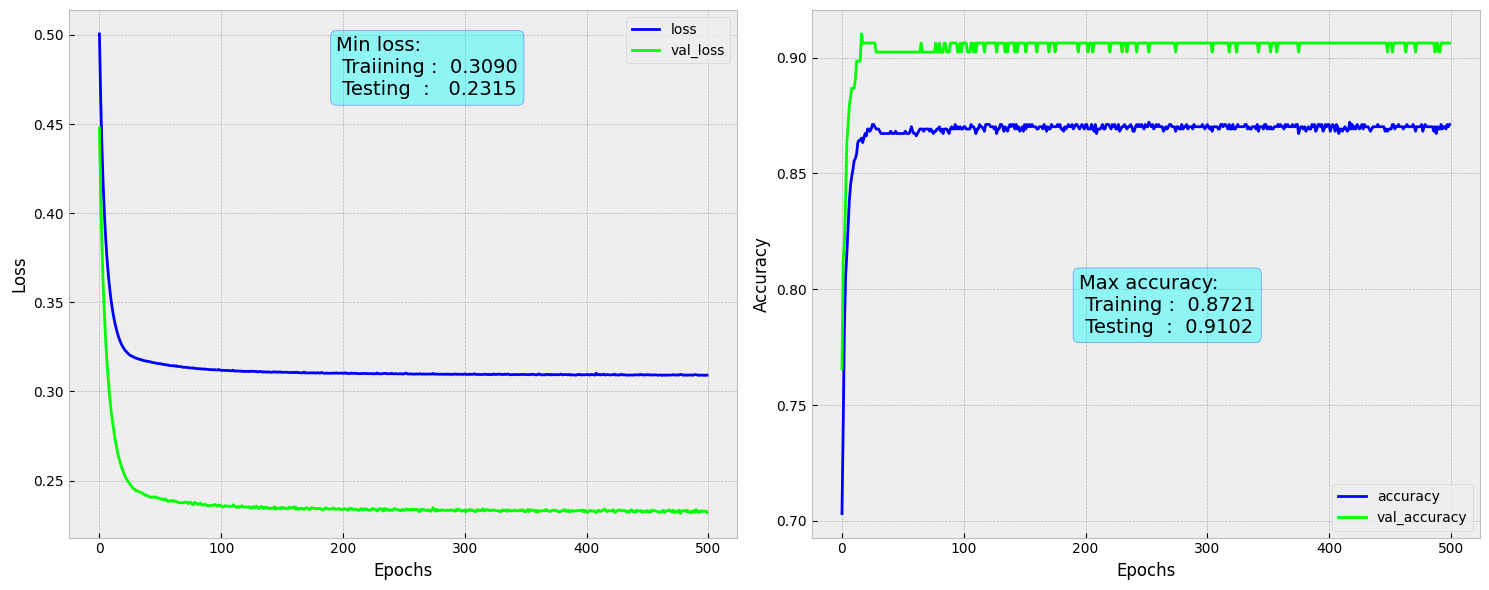

In [21]:
hist_df = pd.DataFrame(history.history)
fn_plot_hist(hist_df)

In [22]:
hist_df[hist_df['val_loss'] == hist_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
477,0.309598,0.868164,0.231504,0.90625


6636/6636 [==============================] - 9s 1ms/step


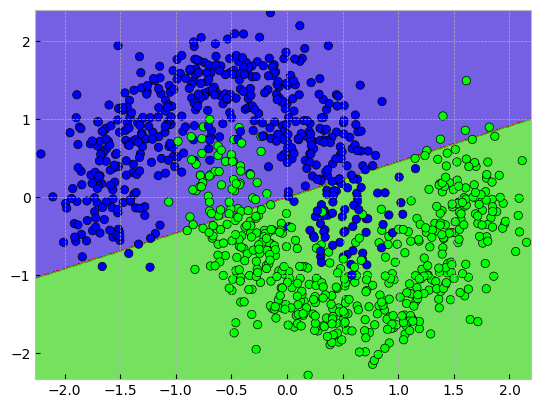

In [25]:
fn_plot_decision_boundary(model, X_train, y_train)